I've had issues in the past about the concentrations being wrong in some of the hlists. I suspect that the ones on sherlock are wrong relative to the ones on SLAC, and I want to confirm here. 

I'm gonna load up the xi_gg saved with the MCMC I ran. I'll then load up the box and HOD of the same params and compute it and see if they align. 

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import h5py
from glob import glob
from ast import literal_eval
from os import path

In [15]:
from pearce.mocks import cat_dict

In [24]:
f = h5py.File('/u/ki/swmclau2/des/SherlockPearceMCMC/HOD_xi_gg_rmin_None_HOD_v5.hdf5', 'r')

In [12]:
xi_sherlock = f['data'][()]

In [13]:
sim_config = eval(f.attrs['sim'])

In [14]:
sim_config

{'cosmo_params': {'H0': 70.7317,
  'Neff': 3.7,
  'ln10As': 3.11395,
  'ns': 0.953515,
  'ombh2': 0.0217629,
  'omch2': 0.12283,
  'w0': -1.13151},
 'gal_type': 'HOD',
 'hod_name': 'zheng07',
 'hod_params': {'alpha': 1.083,
  'logM0': 13.2,
  'logM1': 14.2,
  'logMmin': 13.065313910378768,
  'sigma_logM': 0.2},
 'nd': '5e-4',
 'scale_factor': 1.0,
 'sim_hps': {'boxno': 3,
  'downsample_factor': '1e-2',
  'particles': False,
  'realization': 2,
  'system': 'sherlock'},
 'simname': 'testbox'}

In [26]:
f.close()

In [18]:
sim_hps = sim_config['sim_hps']
sim_hps['system'] = 'ki-ls'

In [75]:
sim_hps

{'boxno': 3,
 'downsample_factor': '1e-2',
 'particles': False,
 'realization': 2,
 'system': 'ki-ls'}

In [19]:
cat = cat_dict[sim_config['simname']](scale_factor = sim_config['scale_factor'], **sim_hps)

In [20]:
cat.load(sim_config['scale_factor'], HOD = sim_config['hod_name'])

In [23]:
cat.populate(sim_config['hod_params'])

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5005-py2.7-linux-x86_64.egg/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_in

In [51]:
r_bins = np.logspace(-1.1, 1.6, 19)
r_points = (r_bins[1:] + r_bins[:-1])/2.0

In [69]:
xis = np.zeros((10, 18))
for i in xrange(10):
    print i,
    cat.populate()
    xis[i] =  cat.calc_xi(rbins = r_bins)
    
xi_slac = xis.mean(axis = 0).squeeze()

0 1 2 3 4 5 6 7 8 9


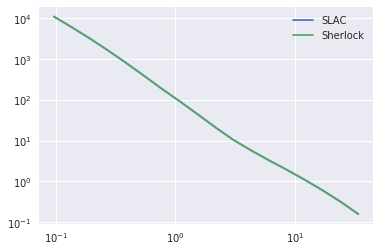

In [70]:
plt.plot(r_points, xi_slac, label = 'SLAC')
plt.plot(r_points, xi_sherlock, label = 'Sherlock')
plt.legend(loc='best')
plt.loglog()
plt.show();

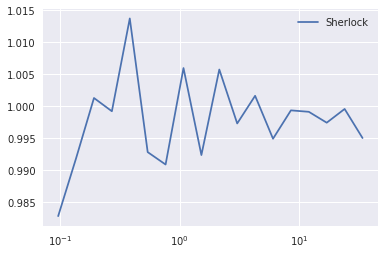

In [71]:
plt.plot(r_points, xi_sherlock/xi_slac, label = 'Sherlock')
plt.legend(loc='best')
plt.xscale('log')
plt.show();

In [74]:
cat.halocat.halo_table['halo_nfw_conc']

17.065468
13.154124
4.845617
9.475545
75.55749
18.425201
18.63927
6.6950407
10.978838
10.647736
15.07388
